# Лабараторная №1. Основый предобработки данных 

Используйте файл своей группы. <br>
Загрузите его в DataFrame и ответьте на вопросы, используя инстурменты из файла preprocessing.ipynb.


#### Воспросы
1. В какой шкале представлены все признаки в наборе?<br>
2. Укажите признак с наименьшей дисперсией.<br>
3. Среднее какого признака отличается для двух классов сильнее всего?<br>
4. В каком классе больше всего skilled работников?<br>
5. Есть ли в наборе признаки с выбросами? Какие?<br>
6. Сколько пропущенных значений в наборе?<br>
7. Попытайтесь заполнить пропущенные значения.<br>
8. Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.<br>
9. Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?<br>
10. Какой признак(и) имеет смысл стандартизировать? Почему?<br>
11. Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.<br>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

np.set_printoptions(precision=3)
pd.set_option('precision', 3)

sns.set()

In [98]:
path='credit_3530203_70102.csv'
credit_df = pd.read_csv(path, index_col=0)

In [16]:
credit_df['num_dependents'].value_counts()

1.0    429
2.0     72
Name: num_dependents, dtype: int64

In [12]:
credit_df.head()


,checking_status,duration,credit_history,credit_amount,employment,personal_status,other_parties,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,1169.0,>=7,male single,none,4.0,real estate,67.0,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,5951.0,1<=X<4,female div/dep/mar,none,2.0,real estate,22.0,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,2096.0,4<=X<7,male single,none,3.0,real estate,49.0,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,7882.0,4<=X<7,male single,guarantor,4.0,life insurance,45.0,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,4870.0,1<=X<4,male single,none,4.0,no known property,53.0,for free,2.0,skilled,2.0,none,yes,bad


#### 1 вопрос
checking_status - <b>ordinal</b> <br>
duration - <b>ratio</b> <br>
credit_history - <b>nominal</b> <br>
credit_amount - <b>ratio</b> <br>
employment - <b>ordinal</b> <br>
personal_status - <b>nominal</b> <br>
other_parties - <b>nominal</b> <br>
residence_since - <b>ratio</b><br>
property_magnitude - <b>nominal</b><br>
age - <b>ratio</b> <br>
housing - <b>nominal</b><br>
existing_credits - <b>ratio</b><br>
job - <b>ordinal</b><br>
num_dependents - <b>ratio</b><br>
own_telephone - <b>nominal</b><br>
foreign_worker - <b>nominal</b><br>
class - <b>ordinal</b><br>

#### 2 
<i>num_dependents</i>

In [ ]:
# Ilya's solution.
print(df.std())
print('\nAnswer:')
print(df.std().index[np.argmin(np.array(df.std()))])

In [17]:
# Lyosha's solution.
credit_df.std().index[np.argmin(credit_df.std())]

'num_dependents'

#### 3

In [ ]:
# Ilya's solution.
gmn = df[df['class'] == 'good'].mean() # Mean for 'good'
bmn = df[df['class'] == 'bad'].mean()  # Mean for 'bad'

difMean = np.abs(gmn - bmn)
print(difMean)
difMaxInd = np.argmax(np.array(difMean))
difMax = difMean.index[difMaxInd]
print('\nAnswer:\n', difMax)

In [43]:
# Lyosha's solution.
means = credit_df.pivot_table(['duration', 'credit_amount','residence_since','age','existing_credits','num_dependents'],['class'], aggfunc='mean')
dif = np.abs(means.loc['bad',:] - means.loc['good',:])
dif_max = dif.index[np.argmax(dif)]
dif_max

'credit_amount'

#### 4

In [99]:
# ILYA
classes = credit_df['class'].value_counts().index # Get classes.
cnts = [] # Store number of skilled workers.

for clss in classes:
    cnts.append(credit_df[credit_df['class'] == clss]['job'].value_counts()['skilled'])
    
maxInd = np.argmax(cnts)
ans = classes[maxInd]
print('\nAnswer:\n', ans)

152

#### 5

Начиная с 5-го задания и далее делали все вместе.

['num_dependents', 'age', 'existing_credits', 'duration', 'credit_amount', 'residence_since']


<AxesSubplot:>

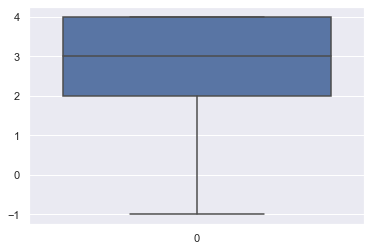

In [15]:
# sns.boxplot(x='checking_status', data=credit_df)
# credit_df[:].hist(figsize=(15, 9))
numeric_vals = list (set(credit_df.describe().columns))
print(numeric_vals)
# sns.boxplot(data=credit_df[numeric_vals])
# sns.boxplot(data=credit_df[set(numeric_vals)-set(['credit_amount'])])
sns.boxplot(data=credit_df['residence_since'])

ответ все, кроме residence since

In [72]:
credit_df.head(1)

,checking_status,duration,credit_history,credit_amount,employment,personal_status,other_parties,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,1169.0,>=7,male single,none,4.0,real estate,67.0,own,2.0,skilled,1.0,yes,yes,good


#### Сколько пропущенных значений в наборе?

In [116]:
credit_df['property_magnitude'].value_counts()

car               173
real estate       147
life insurance    103
Name: property_magnitude, dtype: int64

In [50]:
print('checking_status','credit_amount','residence_since','property_magnitude')
print('ans', 197+6+5+78)

checking_status credit_amount residence_since property_magnitude
ans 286


#### 7 вопрос

In [100]:
credit_df['checking_status'].replace('no checking',np.nan,inplace=True)
credit_df['property_magnitude'].replace('no known property',np.nan,inplace=True)

In [101]:
credit_df['checking_status'].isna().sum()

197

In [102]:
credit_df['credit_amount'].replace(-999,np.nan,inplace=True)
credit_df.fillna(credit_df.median(), inplace=True)

In [103]:
credit_df['residence_since'].replace(-1,np.nan,inplace=True)
credit_df.fillna(credit_df.median(), inplace=True)

In [104]:
credit_df.isna().sum().sum()


275

#### 8 вопрос

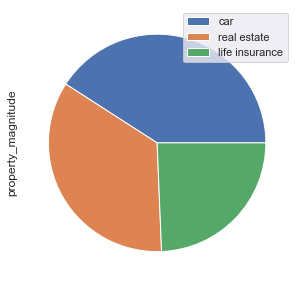

In [141]:
_, ax = plt.subplots(1,1, figsize=(10,5))
credit_df['property_magnitude'].value_counts().plot(kind='pie', title='', labels=None)
ax.legend(labels = credit_df['property_magnitude'].value_counts().index)



<AxesSubplot:xlabel='checking_status', ylabel='count'>

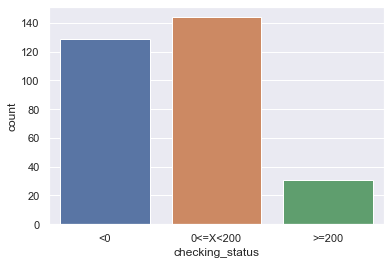

In [142]:
sns.countplot(x='checking_status', data=credit_df)

D:\programms\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

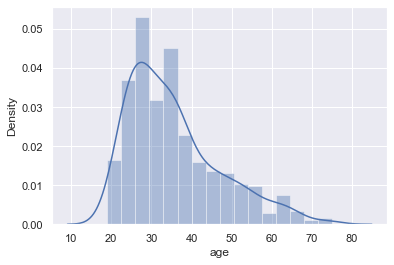

In [144]:
sns.distplot(credit_df['age'])

#### 9 вопрос

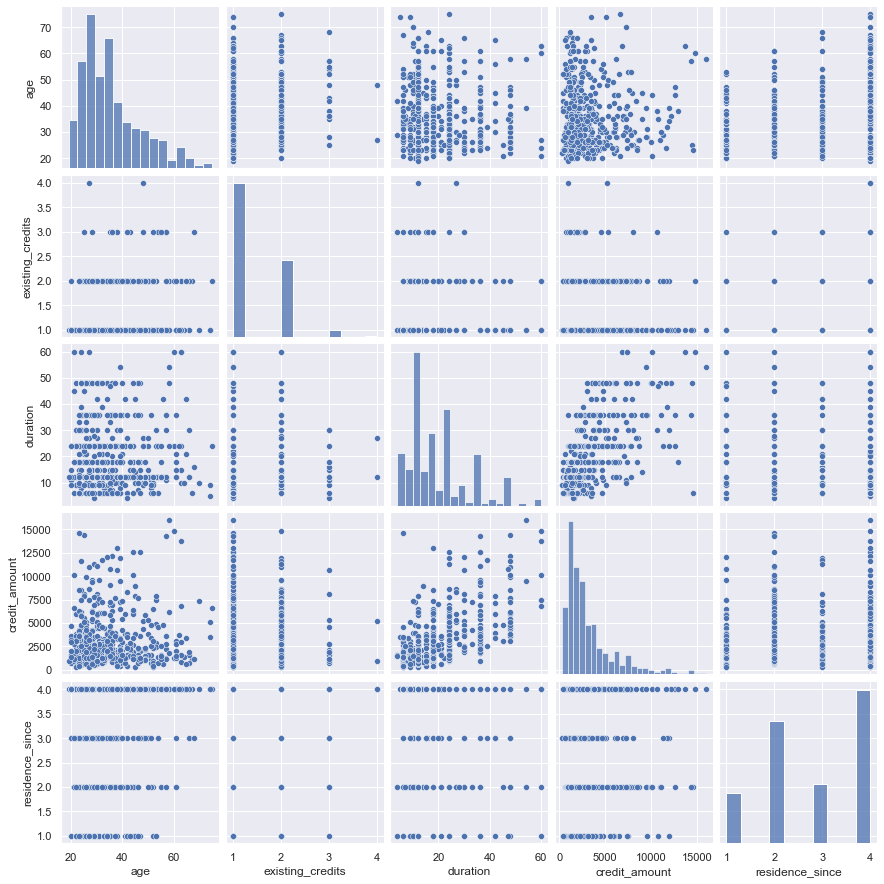

In [151]:
sns.pairplot(credit_df[set(numeric_vals)-set(['num_dependents'])])

<AxesSubplot:>

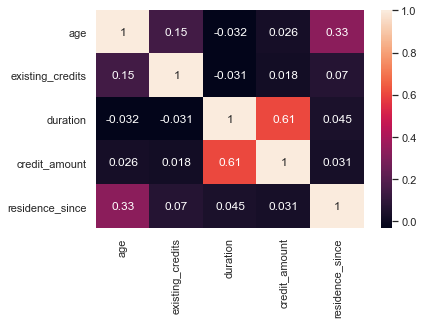

In [170]:
corr_matrix = (credit_df[set(numeric_vals)-set(['num_dependents'])]).corr()
sns.heatmap(corr_matrix, annot=True, annot_kws={"size":12})

##### выводы
1) Самая видня кореляция между суммой кредита и длительность его выплаты, что конечно же логично <br>
2) Между длительность проживания и возрастом тоже видна кореляция, тут еще логичнее, но кореляция не такая большая, <i><b>это важно</b></i><br>
3) Небольшая кореляция наблюдается у возраста и количеством кредитов - чем больше живешь, тем видимо вероятнее, что у тебя есть кредиты и их может быть много

#### 9 вопрос

<AxesSubplot:>

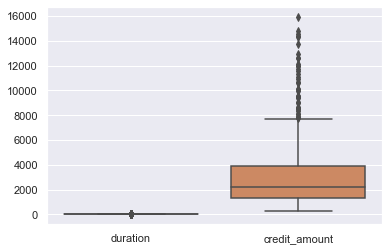

In [165]:
sns.boxplot(data=credit_df[['duration', 'credit_amount']])




In [167]:
std_scaler = StandardScaler().fit(credit_df[['duration','credit_amount']])
cols_std_scaled = std_scaler.transform(credit_df[['duration','credit_amount']])

In [168]:
credit_df_scaled = pd.DataFrame(cols_std_scaled, columns = ['duration', 'credit_amount'])


<AxesSubplot:>

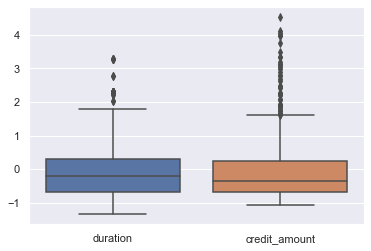

In [169]:
sns.boxplot(data=credit_df_scaled[['duration', 'credit_amount']])

#### Почему мы решили их стандартизировать?
Задаваясь этим вопросом, мы подумали, что между этими колонками наибольшая кореляция, поэтому было бы лучше их привести к одной шкале. А во- вторых, сумма кредита имеет слишком большие значения изначально, так что было бы разумно его уменьшить.

#### 11 вопрос
Наиболее подходящей колонкой было бы добавить фиксированный заработок потенциального кредитера, чтобы знать, за сколько он сможет выплатить кредит, на сколько ему можно выдать кредит, можно ли ему выдать новый кредит и прочее.